In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_theme(style='whitegrid', font_scale = 1.8)
plt.rcParams['figure.figsize'] = (20, 10)
# plt.rcParams['font.sans-serif'] = "Comic Sans MS"
# plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.family'] = "Garamond"
plt.rcParams['font.weight'] = "bold"

In [2]:
resp = pd.read_csv('ens_e_aval_agosto_2021_respostas.csv')
perg = pd.read_excel('ens_e_aval_agosto_2021_perguntas.xlsx', engine='openpyxl')

# Retirando resposta de teste e coluna com emails dos alunos 
resp.drop([0], inplace=True)
resp.drop(['Endereço de e-mail'], axis = 1, inplace=True)
resp_num = resp.copy()
resp_num.columns = range(len(resp.columns))

# Limpeza dos dados
resp_num[2] = resp_num[2].map({'1°':1,'2°':2,'3°':3,'4°':4,'5°':5,'6°':6,'7°':7,'8°':8,'9°':9,'10°':10})

resp_num[0] = pd.to_datetime(resp_num[0])
resp_num[1] = pd.to_numeric(resp_num[1])

for coluna in resp_num.columns:
    if resp_num[coluna].dtype == object and resp_num[coluna].isnull().sum() == 0:
        resp_num[coluna] = resp_num[coluna].map({'Não':0,'Sim':1})

#Função para criar grupos a partir dos períodos em q cada aluno se encontra
def agrupa_alunos(row):
    val = 'Veteranos'
    if row == 1 or row ==2 or row == 3:
        val = 'Calouros'
    elif row == 8 or row ==9 or row ==10:
        val = 'Formandos'
    return val

#Aplicando função na coluna dos períodos e criando nova coluna 
resp_num[20] = resp_num.iloc[:,2].apply(agrupa_alunos)
resp.head()

,Carimbo de data/hora,Em qual ano você entrou na ELT?,A maioria das matérias que você está cursando pertencem a qual período?,As orientações dos professores te direcionam precisamente a estudar o que será avaliado?,Gostaria de ter avaliações mais frequentes?,Comentários pertinentes a esse contexto:,"Em geral, os experimentos práticos em laboratório facilitam a sua compreensão dos conteúdos teóricos?","Há estímulo ou motivação suficiente da metodologia de ensino, ou dos professores, para ""tentar enxergar"" a teoria nas práticas?","Você é capaz de abstrair, na maioria das práticas, os fenômenos teóricos estudados?",Comentários pertinentes a esse contexto:.1,A quantidade de momentos síncronos te satisfaz?,"Você gostaria de ter mais exemplos, a nível de prova, resolvidos pelos professores?",A quantidade de listas de exercícios te satisfaz?,"Nas aulas destinadas a dúvidas, elas são sanadas?",Gostaria de comentar o motivo?,"Até o quarto período do curso, você sente que teve um direcionamento satisfatório para as possíveis carreiras na Eng. Elétrica?","Em relação a esse direcionamento dado pelo departamento, quanto ele te motiva?",Quanto às avaliações:,Gostaria que existissem projetos práticos?,Comentários pertinentes a esse contexto:.2
1,30/08/2021 21:03:35,2020,3°,Sim,Não,NaN,Não,Não,Não,NaN,Sim,Sim,Sim,Não,NaN,Não,2,1.0,10.0,NaN
2,30/08/2021 21:04:15,2017,7°,Sim,Não,NaN,Sim,Não,Sim,NaN,Sim,Não,Não,Sim,NaN,Não,1,3.0,9.0,NaN
3,30/08/2021 21:08:02,2021,1°,Sim,Sim,NaN,Sim,Sim,Não,NaN,Não,Sim,Não,Sim,NaN,Não,4,8.0,9.0,NaN
4,30/08/2021 21:08:34,2018,5°,Não,Sim,NaN,Sim,Não,Não,NaN,Não,Sim,Não,Sim,NaN,Não,2,10.0,10.0,NaN
5,30/08/2021 21:09:11,2018,9°,Não,Sim,NaN,Sim,Não,Sim,NaN,Não,Sim,Não,Não,Estou cursando duas disciplinas quem nem seque...,Não,1,7.0,9.0,NaN


In [6]:
resp_num.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
1,2021-08-30 21:03:35,2020,3,1,0,NaN,0,0,0,NaN,...,1,1,0,NaN,0,2,1.0,10.0,NaN,Calouros
2,2021-08-30 21:04:15,2017,7,1,0,NaN,1,0,1,NaN,...,0,0,1,NaN,0,1,3.0,9.0,NaN,Veteranos
3,2021-08-30 21:08:02,2021,1,1,1,NaN,1,1,0,NaN,...,1,0,1,NaN,0,4,8.0,9.0,NaN,Calouros
4,2021-08-30 21:08:34,2018,5,0,1,NaN,1,0,0,NaN,...,1,0,1,NaN,0,2,10.0,10.0,NaN,Veteranos
5,2021-08-30 21:09:11,2018,9,0,1,NaN,1,0,1,NaN,...,1,0,0,Estou cursando duas disciplinas quem nem seque...,0,1,7.0,9.0,NaN,Formandos


In [232]:
# Função para gráfico de agrupamento
def bar_agrupado(coluna, valor, cor, legenda, alpha = 0.8):
    
    total = resp_num.groupby(by=20, as_index=False).count();
    total = total.reindex(index = [0,2,1]);
    total = total.set_index(pd.Index([0,1,2]));
    frente = resp_num.loc[resp_num[coluna]==valor].groupby(by=20,as_index=False).count();
    frente = frente.reindex(index = [0,2,1]);
    frente = frente.set_index(pd.Index([0,1,2]));

    #'deepskyblue'
    # [6/225,80/225,180/225] 
    ax = sns.barplot(data = total,x=20, y=3,  color = [1/225,50/225,150/225], alpha = 0.5,
                label = 'Total de Respostas',
                order=['Calouros', 'Veteranos', 'Formandos']);
    ax = sns.barplot(data = frente,x=20, y=3, color = cor, alpha = alpha,
                label = legenda,
                order=['Calouros', 'Veteranos', 'Formandos'], ax= ax);
                
    for i in range(len(total)):   
        plt.text(i, total.loc[i,3], total.loc[i,3], ha='center', va='bottom', fontsize = 18);
    for i in range(len(frente)):   
        plt.text(i, frente.loc[i,3], '{:.2f}%'.format((frente.loc[i,3]/total.loc[i,3])*100), ha='center', va='bottom', fontsize = 18);

    plt.legend(fontsize = 18);
    plt.xlabel('');
    plt.ylabel('Quantidade de respostas', fontsize = 18);
    plt.title(resp.columns[coluna], fontsize = 20);

    return ax

In [9]:
#Função para gráfico de pizza
def pizza (coluna):
    sizes = [resp_num.loc[resp_num[coluna] == 1, coluna].count(), resp_num.loc[resp_num[coluna] == 0, coluna].count()]
    plt.pie(sizes,autopct='%1.1f%%', labels=['Sim', 'Não'], explode = (0.1,0), shadow=True, colors=['deepskyblue', 'orangered']);
    plt.title(resp.columns[coluna], fontsize = 18);

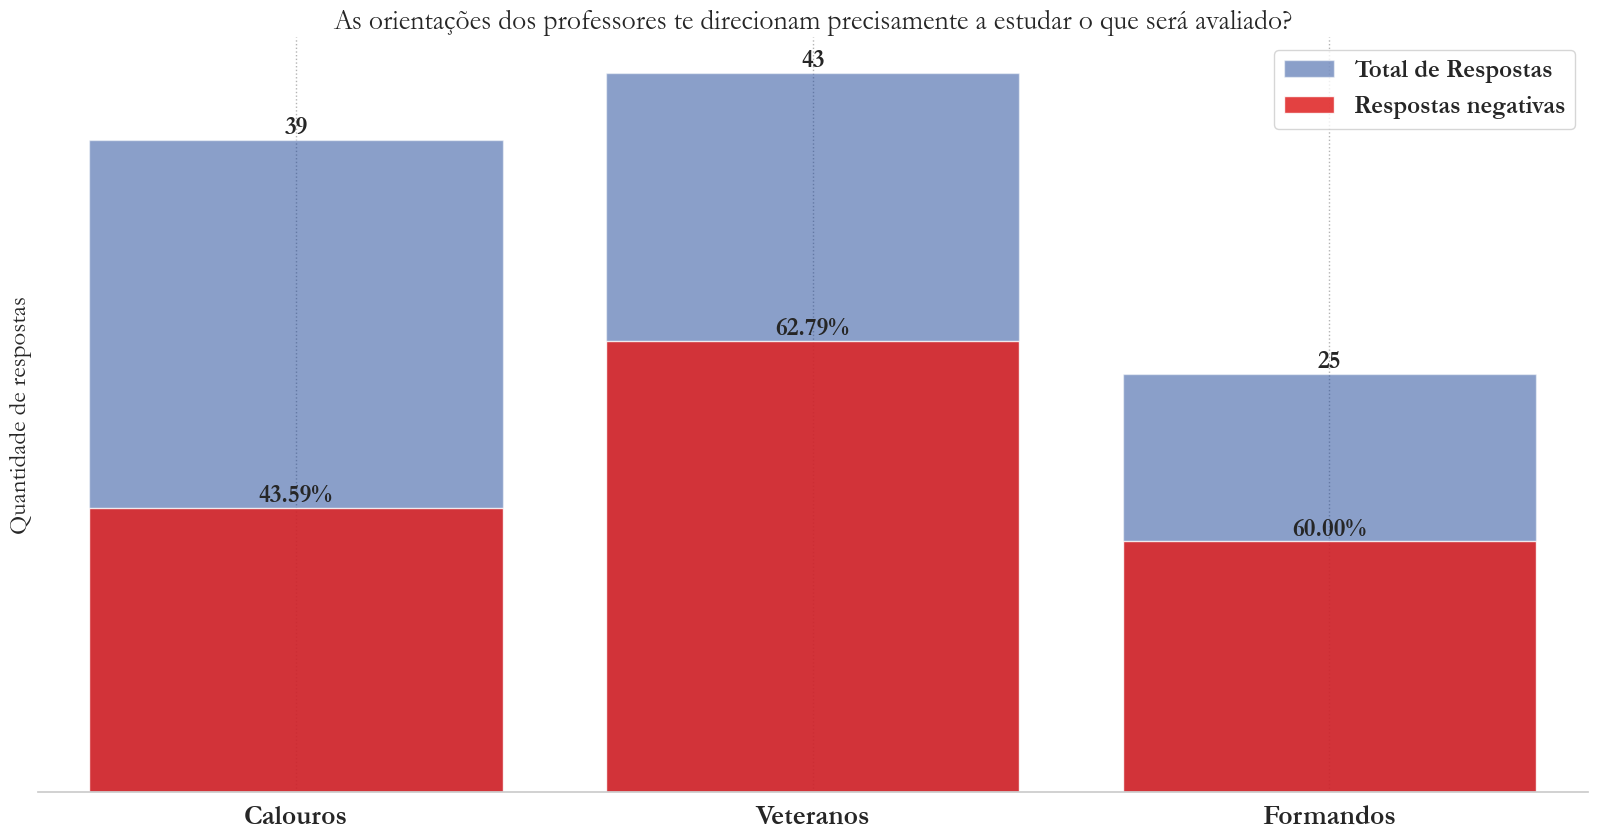

In [238]:
# Grafico de orientação para avaliações (coluna 3)
ax = bar_agrupado(3, 0, 'red', 'Respostas negativas', alpha=0.85);
plt.yticks([]);
ax.xaxis.grid(True, color = 'dimgrey', linestyle = 'dotted', alpha = 0.5);
# ax.xaxis.grid(True, alpha = 0.5);
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

In [470]:
# Função para gráfico de agrupamento
def bar_agrupado2(coluna, valor, cor, legenda, alpha = 0.8):
    
    total = resp_num.groupby(by=20, as_index=False).count();
    total = total.reindex(index = [0,2,1]);
    total = total.set_index(pd.Index([0,1,2]));
    frente = resp_num.loc[resp_num[coluna]==valor].groupby(by=20,as_index=False).count();
    frente = frente.reindex(index = [0,2,1]);
    frente = frente.set_index(pd.Index([0,1,2]));
    dummy = total.copy()
    dummy.loc[:,3] = 100

    # total.loc[:] = 100
    #'deepskyblue'
    # [6/225,80/225,180/225] 
    ax = sns.barplot(data = dummy,x=20, y=3,  color = [1/225,50/225,150/225], alpha = 0.5,
                label = 'Total de Respostas',
                order=['Calouros', 'Veteranos', 'Formandos']);

    pct = frente.copy()
    pct.loc[:,3] = round((frente.loc[:,coluna]/total.loc[:,coluna])*100,2)
    ax = sns.barplot(data = pct,x=20, y=3, color = cor, alpha = alpha,
                label = legenda,
                order=['Calouros', 'Veteranos', 'Formandos'], ax= ax);
                
    for i in range(len(total)):   
        plt.text(i, dummy.loc[i,3], '(n = {:.0f})'.format(total.loc[i,3]), ha='center', va='bottom', fontsize = 24);
    for i in range(len(frente)):   
        plt.text(i, (frente.loc[i,3]/total.loc[i,3])*100, '{:.2f}%'.format((frente.loc[i,3]/total.loc[i,3])*100), ha='center', va='bottom', fontsize = 24);

    plt.legend(fontsize = 18,loc='upper left', bbox_to_anchor=(-.1, 1));
    plt.xlabel('',);
    plt.ylabel('Quantidade de respostas [n,%]', fontsize = 30);
    plt.title(resp.columns[coluna], fontsize = 34);

    return ax

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

AttributeError: 'bool' object has no attribute 'all'

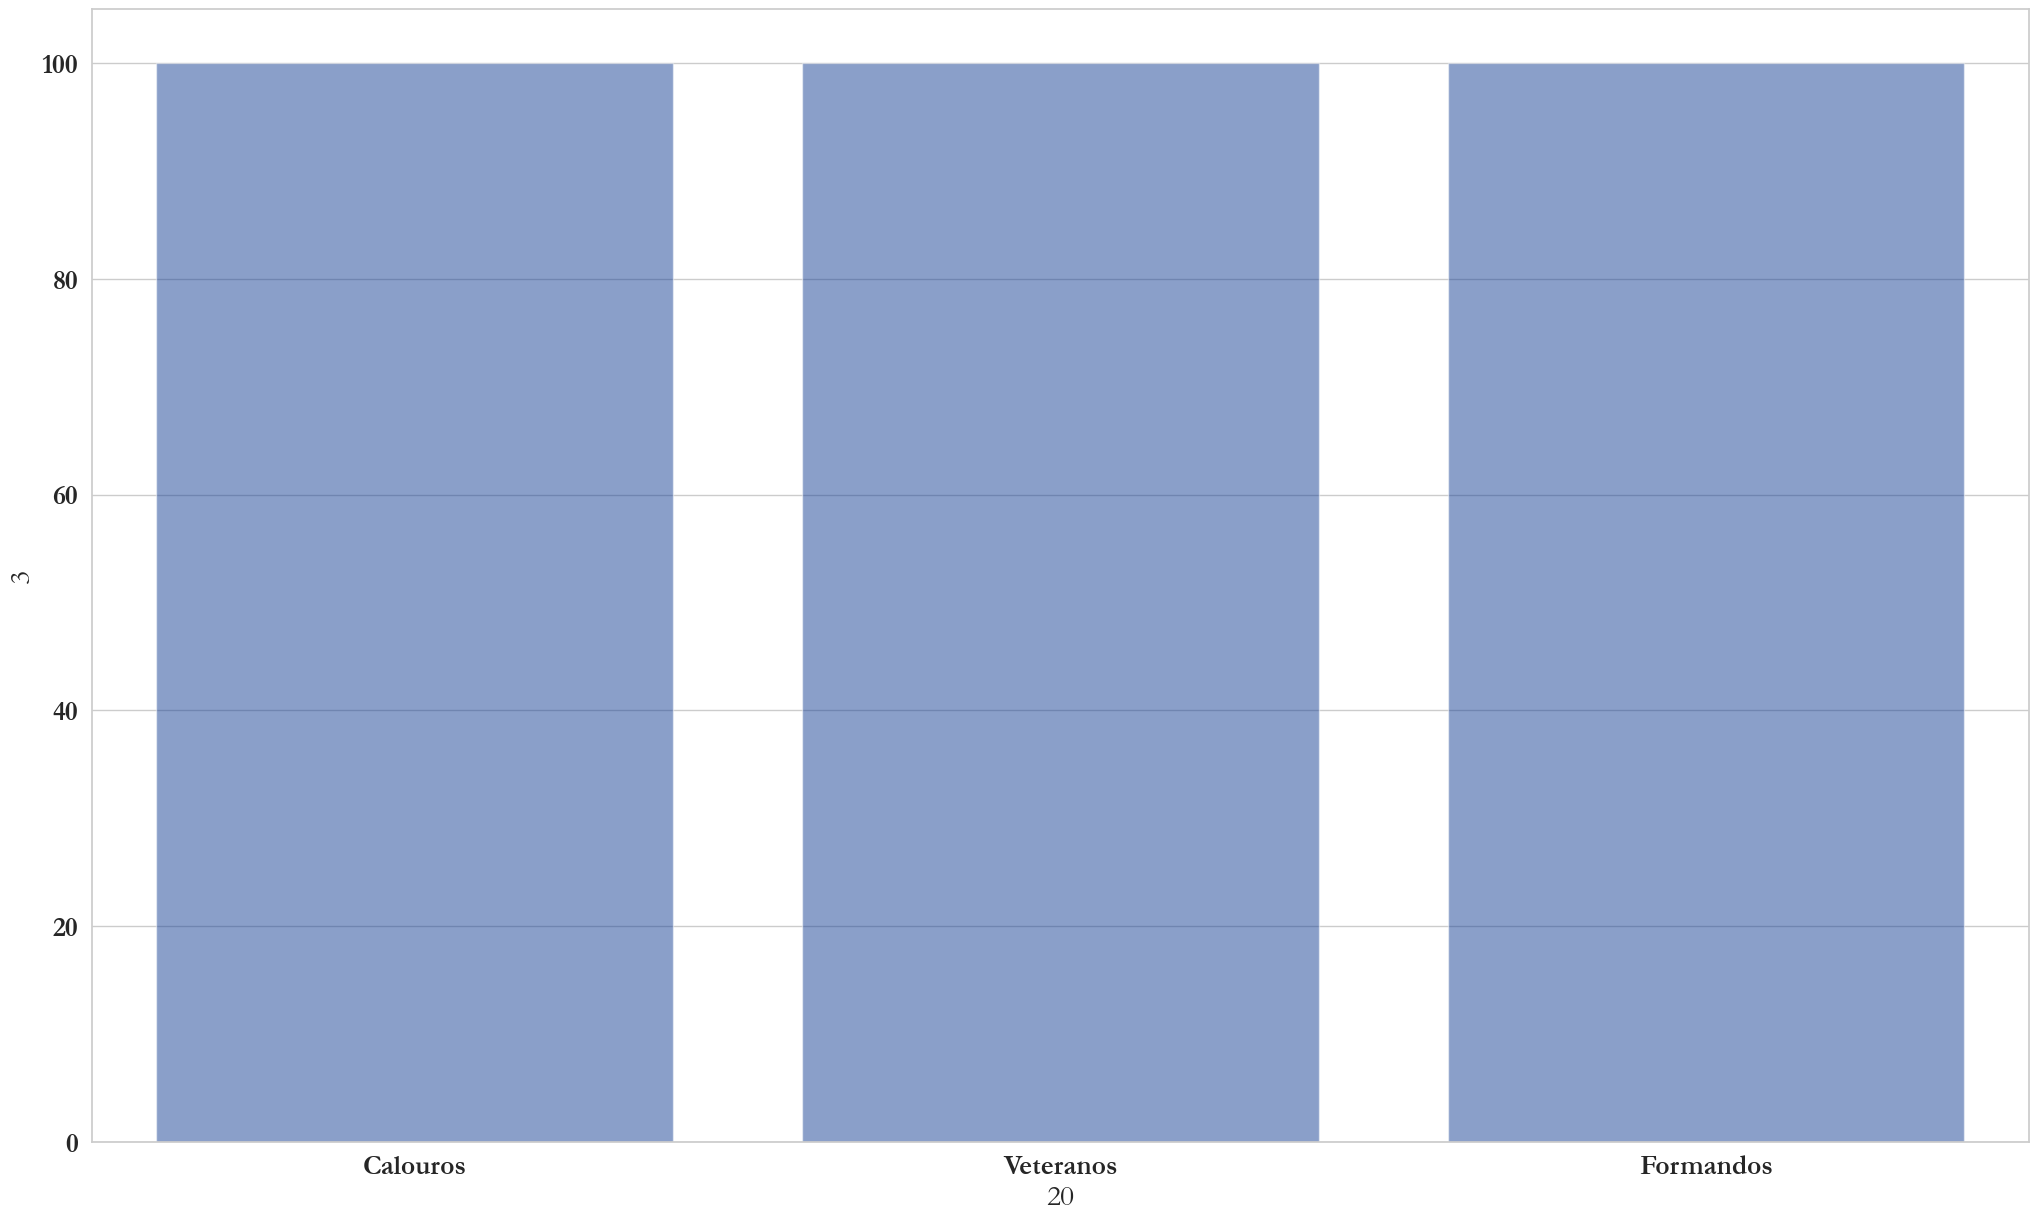

In [471]:
# Grafico de orientação para avaliações (coluna 3)
plt.rcParams['figure.figsize'] = (25, 15)
ax = bar_agrupado2(8, 0, 'red', 'Respostas negativas', alpha=0.85);
# ax = bar_agrupado2(8, 1, 'green', 'Respostas positivas', alpha=0.85);
change_width(ax, .60);

plt.yticks([]);
ax.xaxis.grid(True, color = 'dimgrey', linestyle = 'dotted', alpha = 0.5);
# ax.xaxis.grid(True, alpha = 0.5);

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.rcParams['figure.figsize'] = (20, 10)

In [26]:
#Função para gráfico de pizza
def pizza2 (coluna):
    sizes = [resp_num.loc[resp_num[coluna] == 1, coluna].count(), resp_num.loc[resp_num[coluna] == 0, coluna].count()]
    caeltdark = [9/225,39/225,87/225]
    caeltlight = [1/225,50/225,150/225]
    ppp = plt.pie(sizes,autopct='%1.1f%%', labels=['Sim', 'Não'], explode = (0.06,0), shadow=False, colors=[caeltlight, 'firebrick']);
    plt.title(resp.columns[coluna], fontsize = 18);
    return ppp

# 2 - Como alunos se sentem
- [x] Demanda por orientação de carreira - google
- [x] Demanda por projetos práticos - google

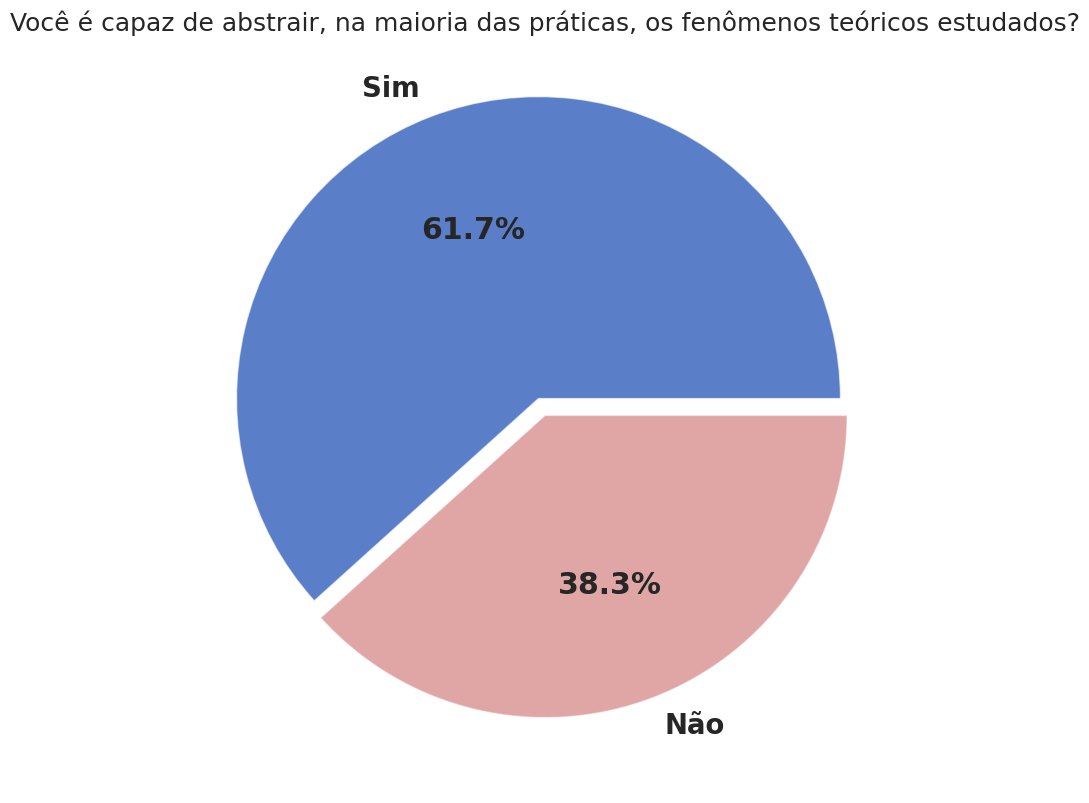

In [27]:
# 2.1 - demanda por orientação de carreira (coluna 15)
ppp = pizza2(8)

#neg
# ppp[0][0].set_alpha(0.4)
# ppp[0][1].set_alpha(0.85)

#pos
ppp[0][0].set_alpha(0.65)
ppp[0][1].set_alpha(0.4)

findfont: Font family ['Garamond'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Garamond'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Garamond'] not found. Falling back to DejaVu Sans.


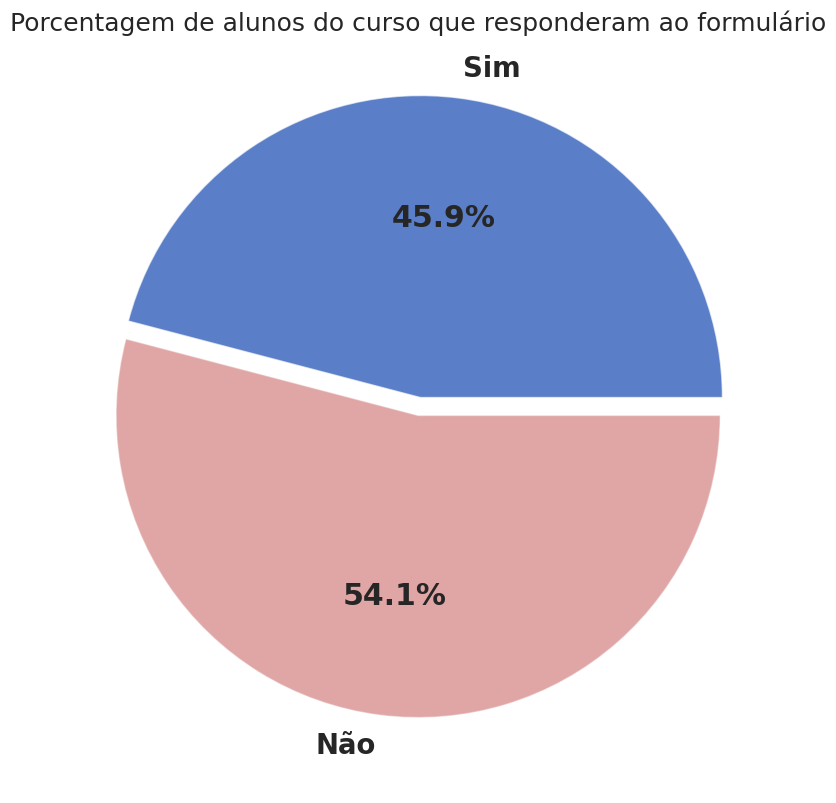

In [3]:
sizes = [len(resp_num), 233-len(resp_num)]
caeltdark = [9/225,39/225,87/225]
caeltlight = [1/225,50/225,150/225]
ppp = plt.pie(sizes,autopct='%1.1f%%', labels=['Sim', 'Não'], explode = (0.06,0), shadow=False, colors=[caeltlight, 'firebrick']);
plt.title('Porcentagem de alunos do curso que responderam ao formulário', fontsize = 18);

ppp[0][0].set_alpha(0.65)
ppp[0][1].set_alpha(0.4)

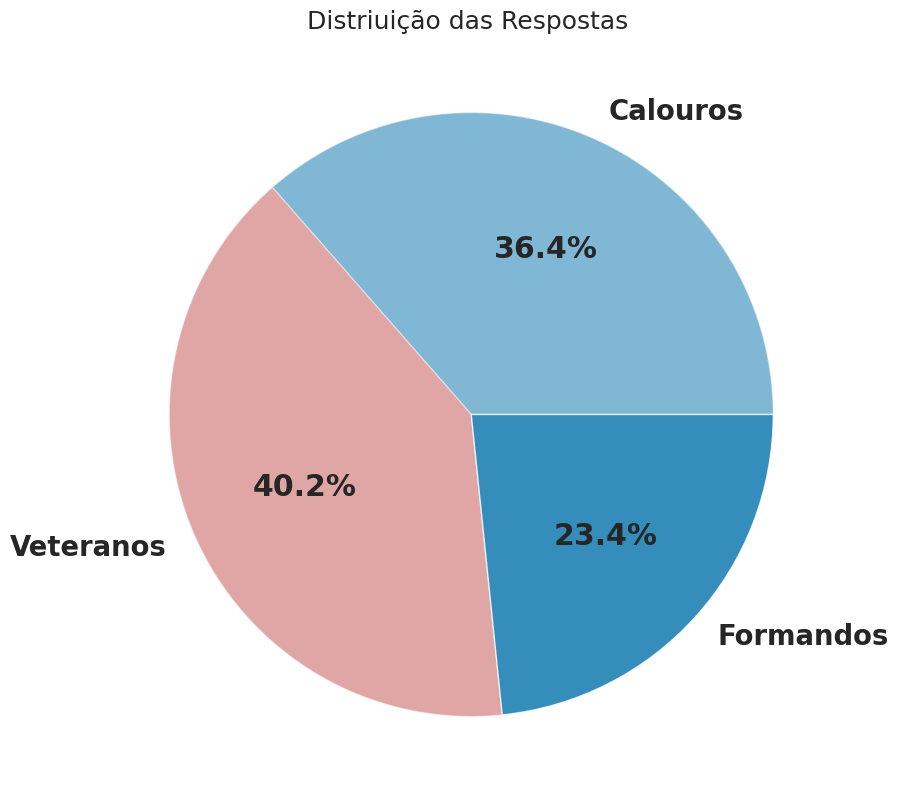

In [4]:
group = resp_num.groupby(by=20).count()
sizes = [group.loc['Calouros'][0], group.loc['Veteranos'][0], group.loc['Formandos'][0]]
caeltdark = [9/225,39/225,87/225]
caeltlight = [1/225,100/225,150/225]
ppp = plt.pie(sizes,autopct='%1.1f%%', labels=['Calouros', 'Veteranos', 'Formandos'], explode = (0,0,0), shadow=False, colors=[caeltlight, 'firebrick']);
plt.title('Distriuição das Respostas ', fontsize = 18);

ppp[0][0].set_alpha(0.5)
ppp[0][1].set_alpha(0.4)
ppp[0][2].set_alpha(0.8)

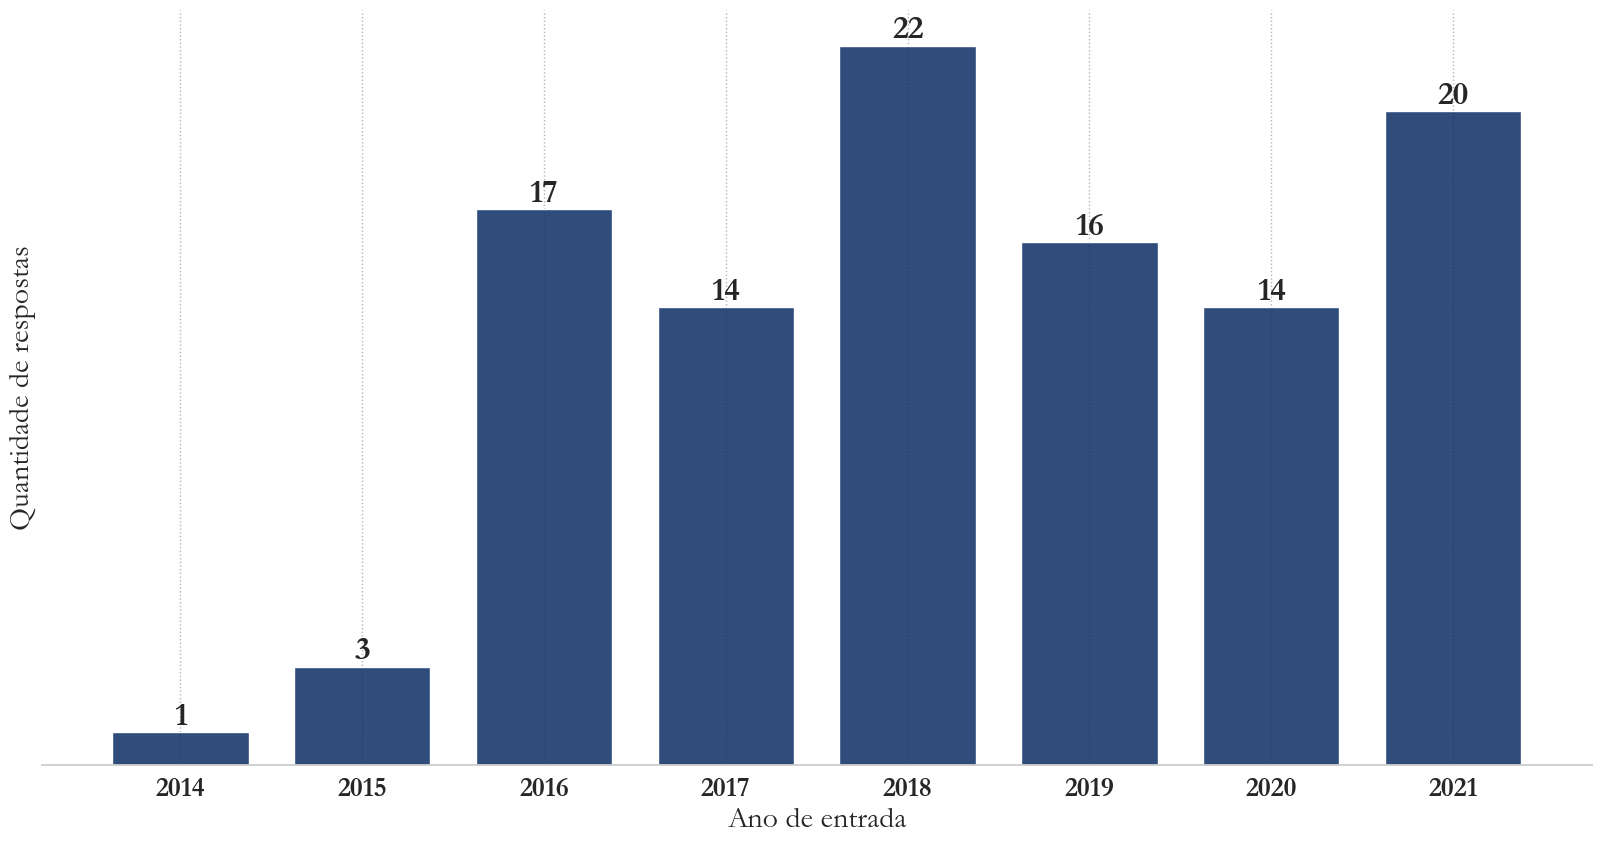

In [421]:
# print(plt.axes)
ax = plt.axes()   

# color = 'deepskyblue'
sns.histplot(resp_num.sort_values(by=1,ascending=False)[1], discrete = True, color = [9/225,39/225,87/225], ax = ax,shrink= 0.75, alpha = 0.85);
plt.yticks([]);
plt.ylabel('Quantidade de respostas');
plt.xlabel('Ano de entrada');
ax.xaxis.grid(True) # horz lines
ax.yaxis.grid(False) # vertical lines

di = 2021
val = resp_num.sort_values(by=1,ascending=False).groupby(by = 1).count().loc[di,0]
plt.text(x = di, y = val,s = str(val), ha='center', va='bottom', fontsize = 24)

for i in resp_num.sort_values(by=1,ascending=False)[1]:  
    if di > i:
        di = i
        val = resp_num.sort_values(by=1,ascending=False).groupby(by = 1).count().loc[i,0]
        plt.text(x = i, y = val,s = str(val), ha='center', va='bottom', fontsize = 24)

# plt.title('Número de repostas por ano de entrada')
ax.xaxis.grid(True, color = 'dimgrey', linestyle = 'dotted', alpha = 0.5);
# ax.xaxis.grid(True, alpha = 0.5);
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

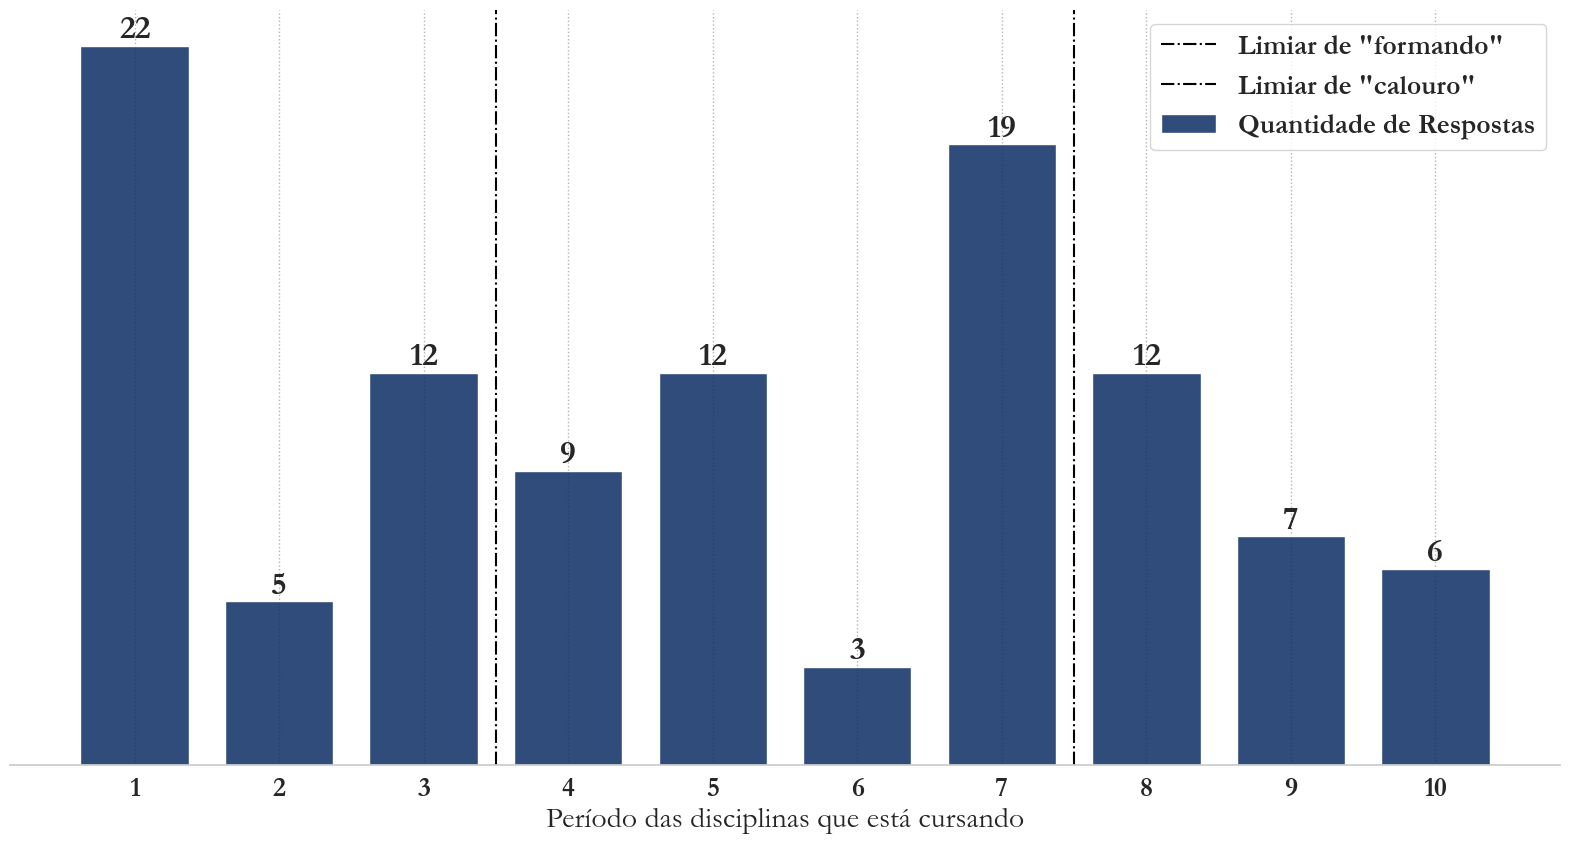

In [399]:
# print(plt.axes)
ax = plt.axes()   

# color = 'deepskyblue'
sns.histplot(resp_num.sort_values(by=2,ascending=False)[2], discrete = True, color = [9/225,39/225,87/225], ax = ax,shrink= 0.75, alpha = 0.85);
plt.yticks([]);
plt.xticks(np.arange(10,0,-1));
# plt.ylabel('Quantidade de respostas [n]');
plt.ylabel('');
plt.xlabel('Período das disciplinas que está cursando');
ax.xaxis.grid(True) # horz lines
ax.yaxis.grid(False) # vertical lines

di = 10
val = resp_num.sort_values(by=2,ascending=False).groupby(by = 2).count().loc[di,0]
plt.text(x = di, y = val,s = str(val), ha='center', va='bottom', fontsize = 24)

for i in resp_num.sort_values(by=2,ascending=False)[2]:  
    if di > i:
        di = i
        val = resp_num.sort_values(by=2,ascending=False).groupby(by = 2).count().loc[i,0]
        plt.text(x = i, y = val,s = str(val), ha='center', va='bottom', fontsize = 24)

# plt.title('Número de repostas por ano de entrada')
ax.xaxis.grid(True, color = 'dimgrey', linestyle = 'dotted', alpha = 0.5);
# ax.xaxis.grid(True, alpha = 0.5);
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.axvline(x=3.5, linestyle = '-.', color = 'black');
plt.axvline(x=7.5, linestyle = '-.', color = 'black');
plt.legend(['Limiar de "formando"','Limiar de "calouro"','Quantidade de Respostas']);

Text(0.5, 1.0, 'Gostaria que existissem projetos práticos?')

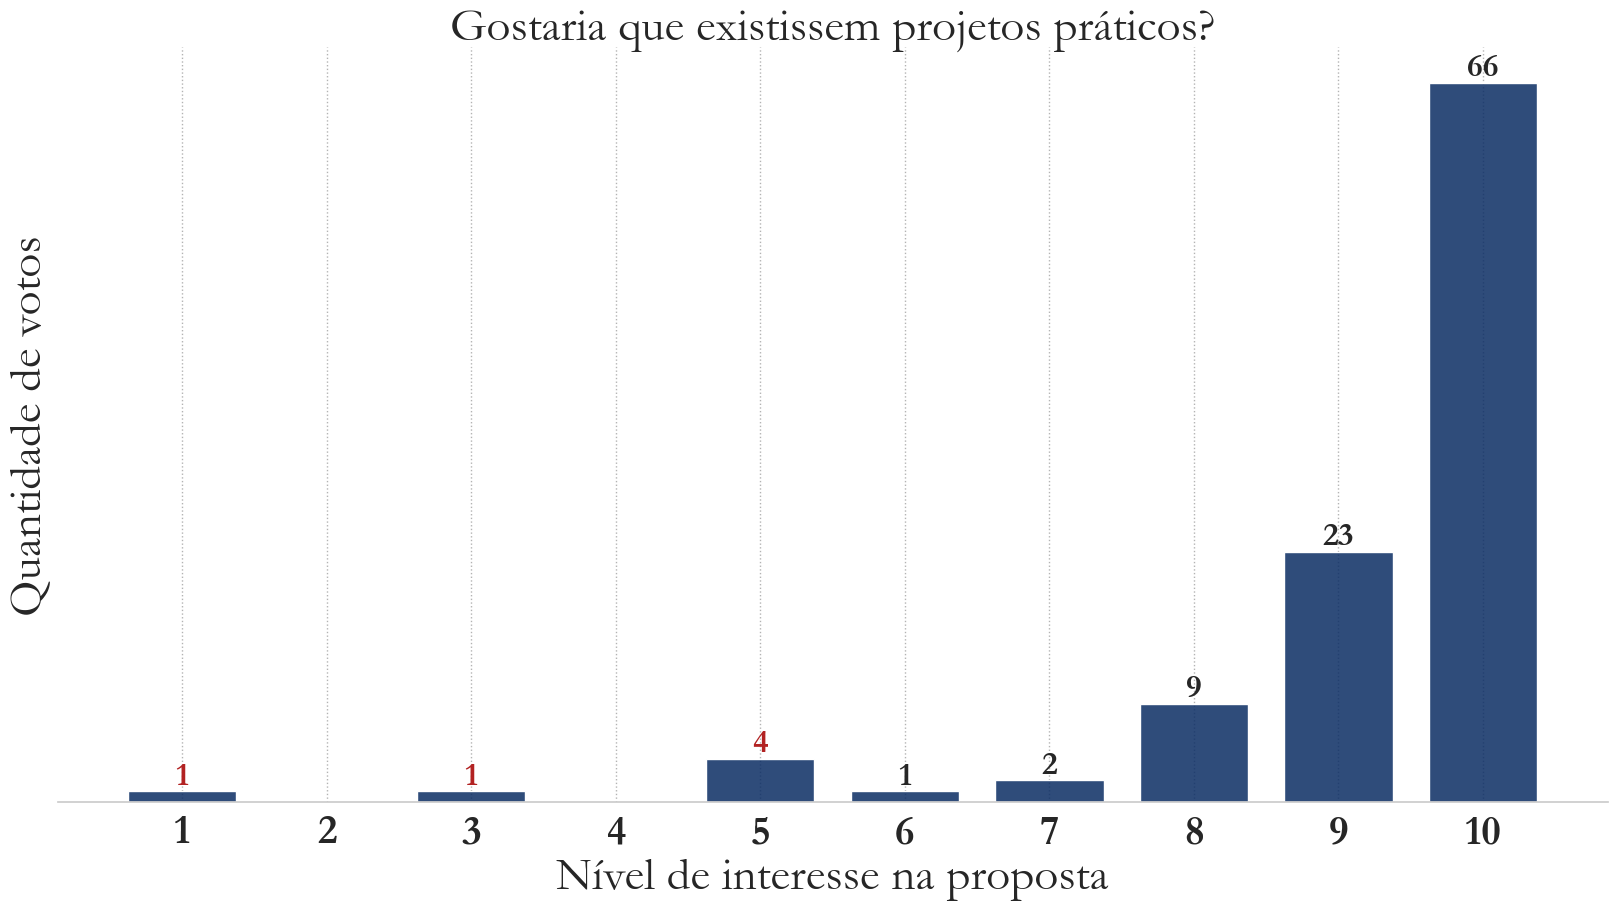

In [266]:
# 2.2 - grafico de demanda projetos praticos (coluna 18)
ax = sns.histplot(data = resp_num, x  = 18, discrete = True, color = [9/225,39/225,87/225], alpha = 0.85, shrink=0.75);

di = 10
col = 18
val = resp_num.sort_values(by=col,ascending=False).groupby(by = col).count().loc[di,0]
plt.text(x = di, y = val,s = str(val), ha='center', va='bottom', fontsize = 24)

for i in resp_num.sort_values(by=col,ascending=False)[col]:  
    if di > i:
        
        di = i
        val = resp_num.sort_values(by=col,ascending=False).groupby(by = col).count().loc[i,0]

        if i <= 5: plt.text(x = i, y = val,s = str(val), ha='center', va='bottom', fontsize = 24, color = 'firebrick')
        else:  plt.text(x = i, y = val,s = str(val), ha='center', va='bottom', fontsize = 24)

plt.xlabel('Nível de interesse na proposta', fontsize = 34)
plt.ylabel('Quantidade de votos', fontsize = 34)
plt.yticks([])
plt.xticks(np.arange(1,11,1), fontsize = 30)

ax.xaxis.grid(True, color = 'dimgrey', linestyle = 'dotted', alpha = 0.5);
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.title(resp.columns[col], fontsize = 34);


# 3 - Mudanças na teoria
- [] Frequência de avaliação - agrupados
- [] Exemplos a nível de prova - agrupados

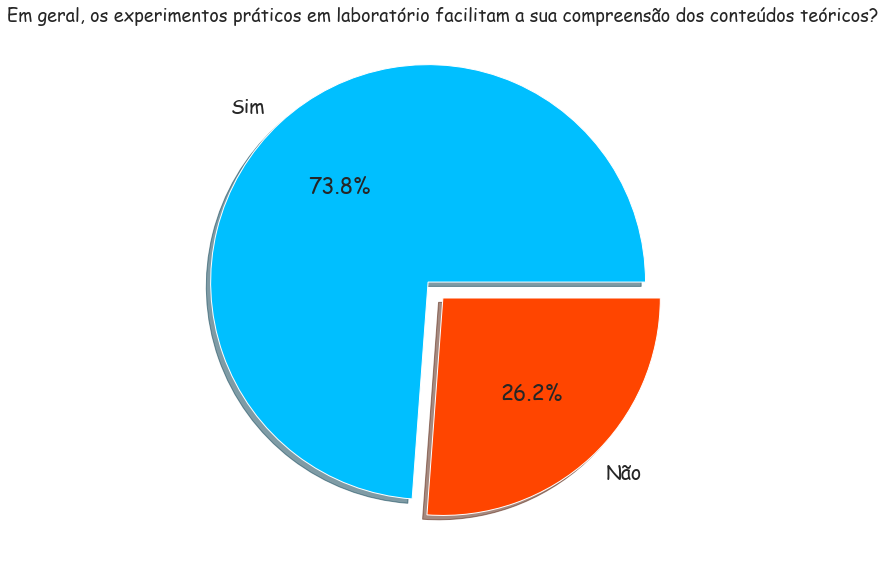

In [6]:
pizza(6)

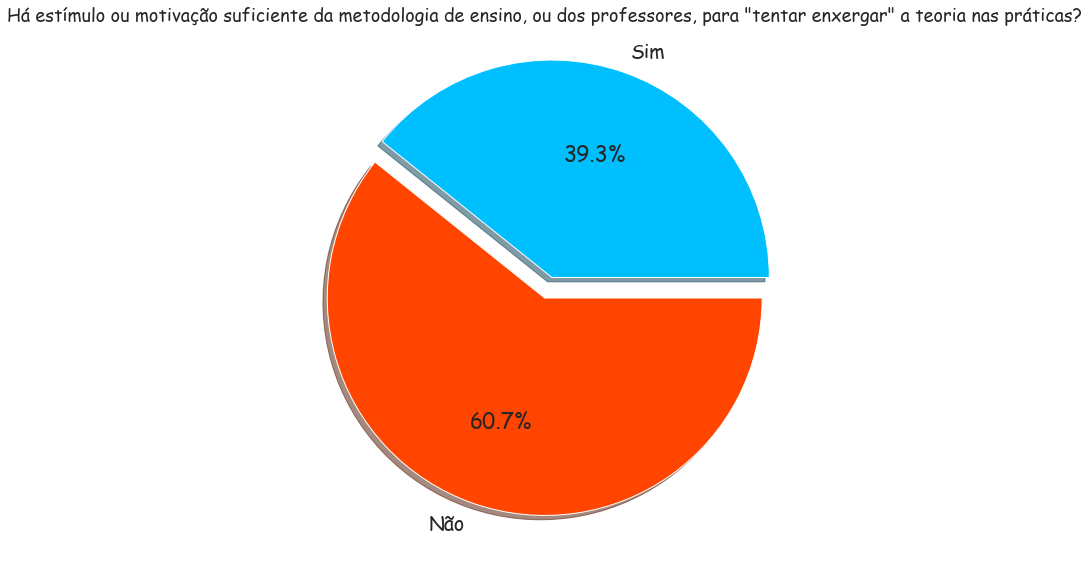

In [7]:
pizza(7)

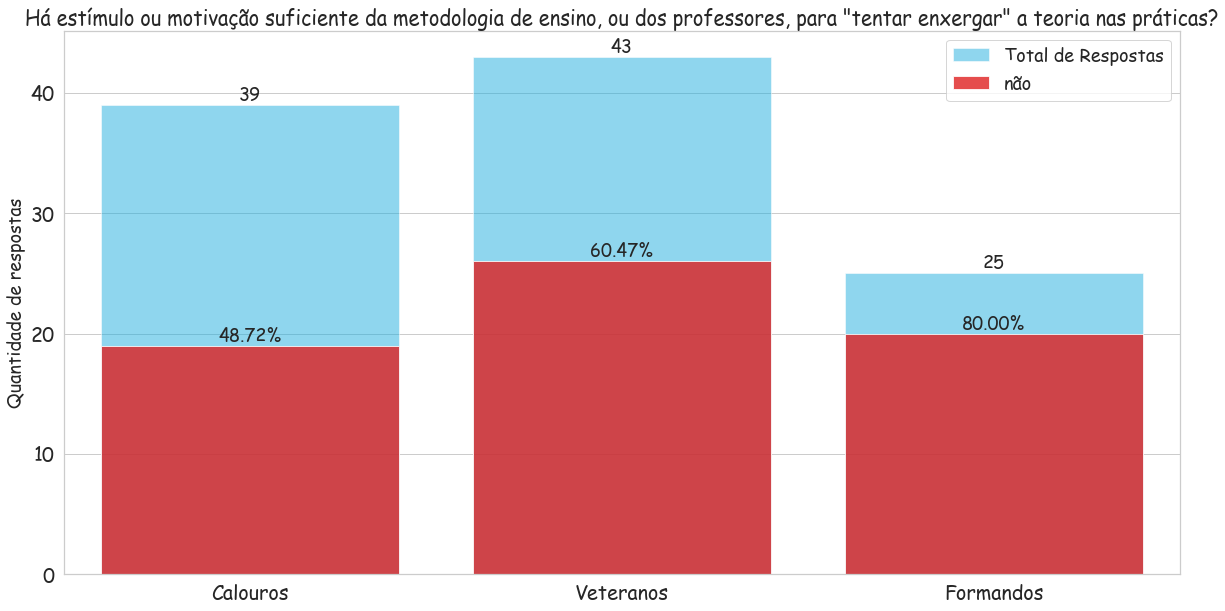

In [8]:
bar_agrupado(7, 0, 'red', 'não')

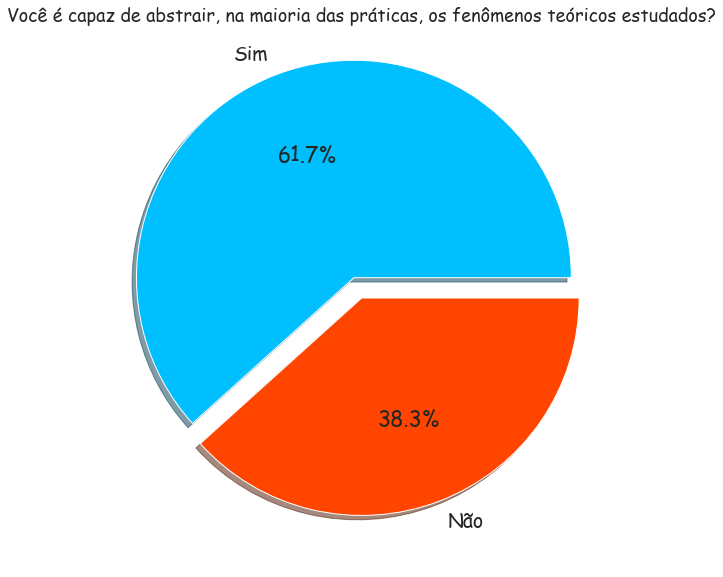

In [9]:
pizza(8)

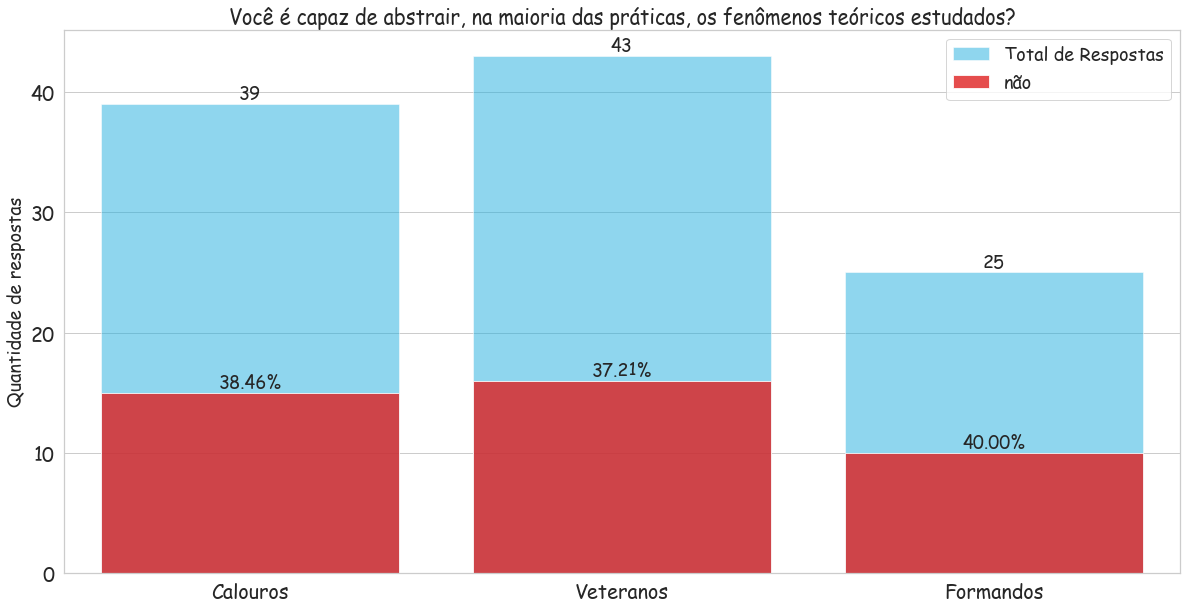

In [13]:
bar_agrupado(8, 0, 'red', 'não')

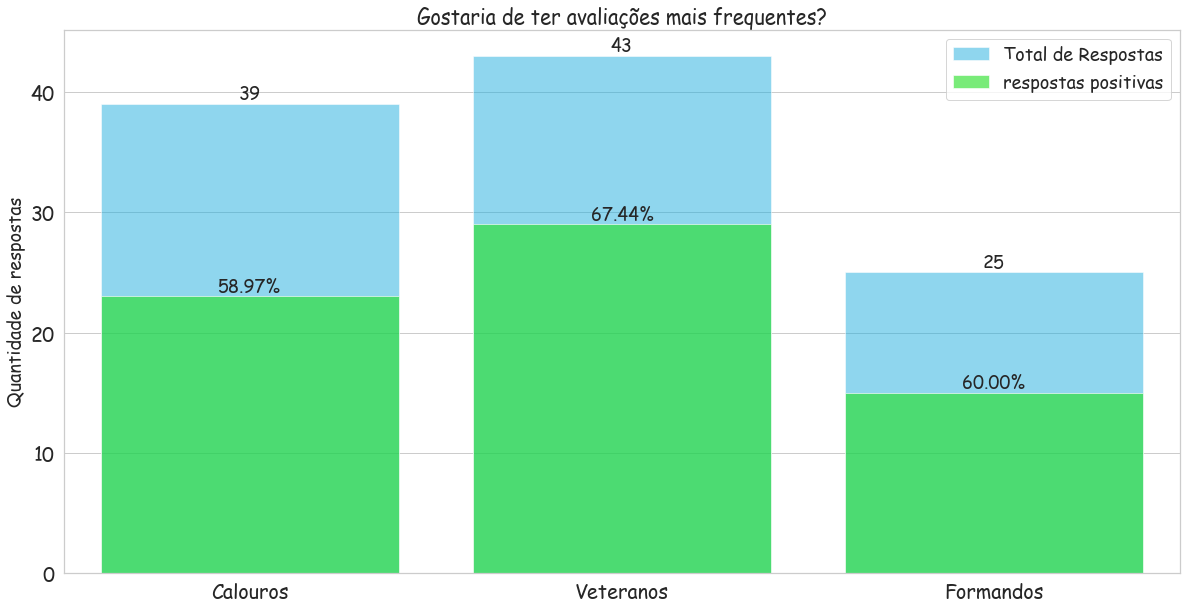

In [55]:
bar_agrupado(4, 1, 'lime', 'respostas positivas', alpha=0.6)

C:\Users\guial\AppData\Local\Temp/ipykernel_12124/2351572526.py:4: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(sizes,autopct='%1.1f%%', labels=['Sim', 'Não'], explode = (0.1,0), shadow=True, colors=['deepskyblue', 'orangered']);


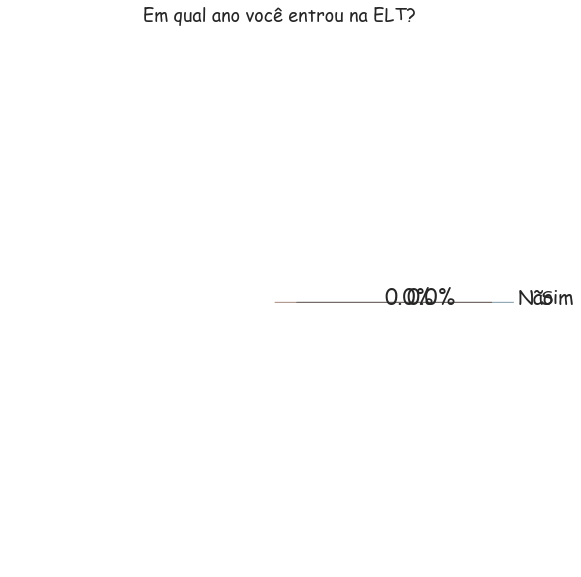

In [16]:
pizza(1)

In [ ]:
sns.distplot(resp_num, 2, )

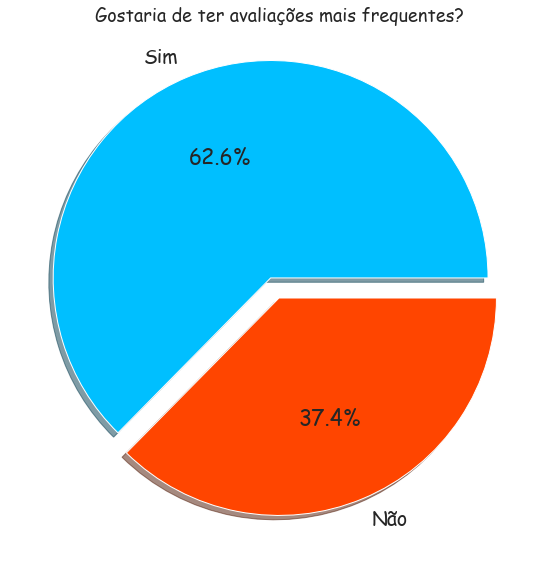

In [57]:
pizza(4)